# A genetic algorithm for optimizing traveling salesman problem

Suppose there are some nodes that are labeled by $1,2,\dots,n$ and $d_{i,j}$ represents the distance from node $i$ to node $j$. The objective of the traveling salesman problem (TSP) is to find the shortest route that visits each node exactly ones and returns to the origin city.

A solution of a TSP can be written as a permutation $p_1 p_2\dots p_n$ of the elements $1,2,\dots,n$. The distance of $p_1 p_2\dots p_n$ is calculated by

$$
\sum_{i=1}^{n}d_{p_i,p_{i+1}}
$$

where $p_{n+1} = p_1$.

https://github.com/luthfishahab/geneticalgorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20])

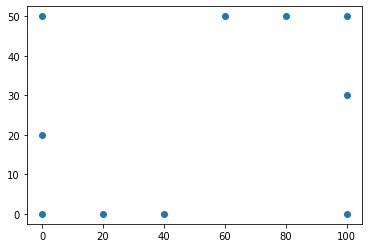

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 20

# maximum generation
N = 100

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104],
       [ 94,  78,  64,  53,  28,  20,   0,  20,  80,  85],
       [ 78,  64,  53,  64,  44,  40,  20,   0,  60,  67],
       [ 50,  53,  64, 111, 101, 100,  80,  60,   0,  30],
       [ 20,  28,  44, 101, 100, 104,  85,  67,  30,   0]])

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)

    for i in range(n):
        pop[i] = np.random.permutation(m)

    pop = pd.DataFrame(pop)

    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)

    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b

    pop['fitness'] = fitness

    return pop

In [8]:
# You can define your randomSelection here
def randomSelection():
    position = np.random.permutation(n)

    return position[0], position[1]

In [9]:
# You can define your crossover here
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popc.loc[i] = x

    return popc

In [10]:
def mutation(pop):
    popm = pop.copy()

    for i in range(n):
        position = np.random.permutation(m)
        a = position[0]
        b = position[1]
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [11]:
def combinePopulation(pop, popm):
    popAll = pd.concat([pop, popm])

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [12]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])

    popAll.index = range(len(popAll))

    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)

    return pop

In [14]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b, marker = 'o')
    plt.show()

Solution in population 0
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  5  6  1  9  4  8  7  3  0      669


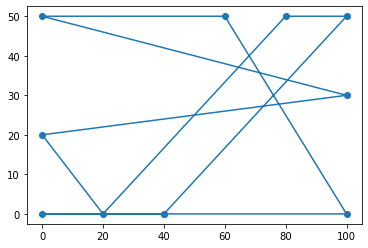


Best solution in population 1
   0  1  2  3  4  5  6  7  8  9  fitness
0  0  8  6  7  1  2  3  5  4  9      484


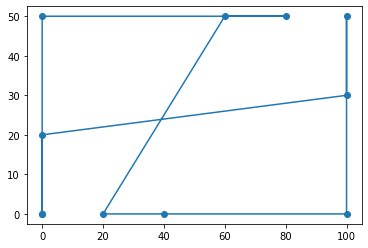


Best solution in population 2
   0  1  2  3  4  5  6  7  8  9  fitness
0  0  8  6  7  1  2  3  5  4  9      484


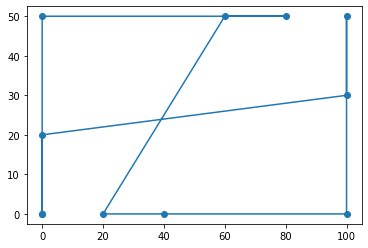


Best solution in population 3
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  7  1  0  8  9  6  4  5  3      460


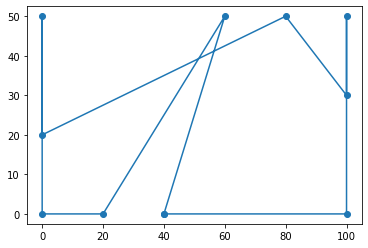


Best solution in population 4
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  7  1  0  8  9  6  4  5  3      460


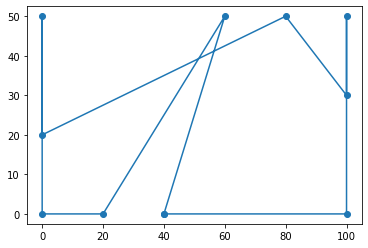


Best solution in population 5
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  5  4  3  2  9  1  0  8  6      392


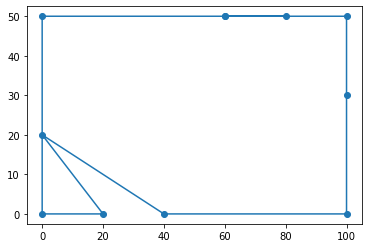


Best solution in population 6
   0  1  2  3  4  5  6  7  8  9  fitness
0  7  5  4  3  2  9  1  0  8  6      392


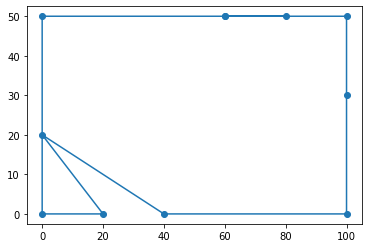


Best solution in population 7
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  8  0  1  7  6  5  4  3      358


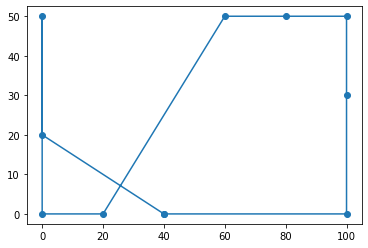


Best solution in population 8
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  8  0  1  7  6  5  4  3      358


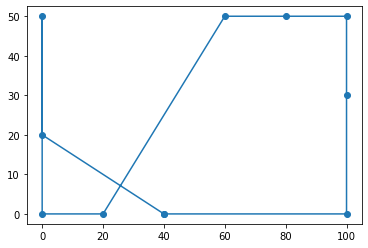


Best solution in population 9
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  8  0  1  7  6  5  4  3      358


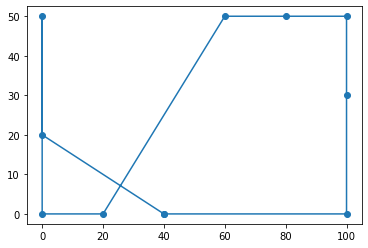


Best solution in population 10
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  8  0  1  7  6  5  4  3      358


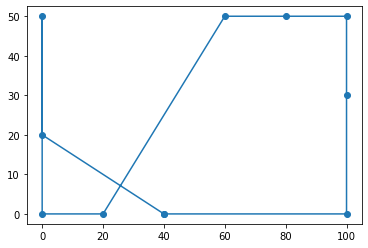


Best solution in population 11
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  8  0  1  7  6  5  4  3      358


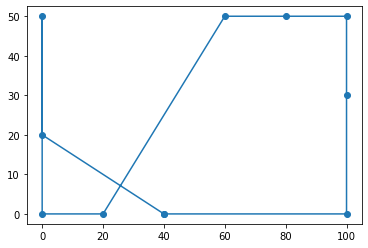


Best solution in population 12
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  8  0  1  7  6  5  4  3      358


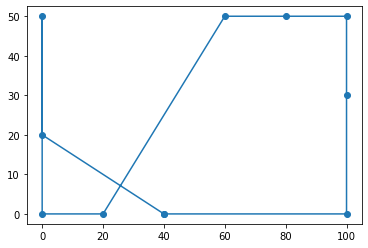


Best solution in population 13
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  8  0  1  7  6  5  4  3      358


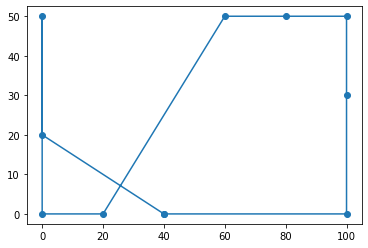


Best solution in population 14
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  0  1  8  7  6  5  4  3      347


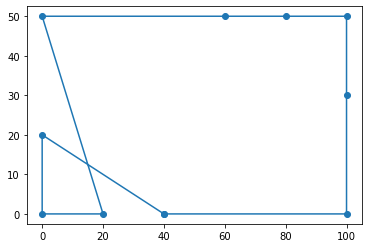


Best solution in population 15
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  0  1  8  7  6  5  4  3      347


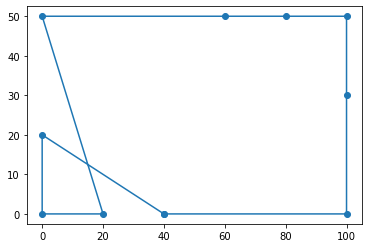


Best solution in population 16
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  0  1  8  7  6  5  4  3      347


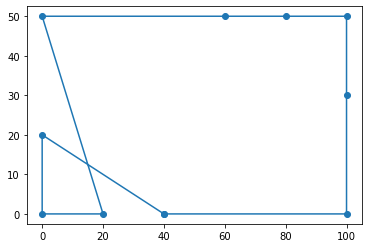


Best solution in population 17
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  9  0  1  8  7  6  5  4  3      347


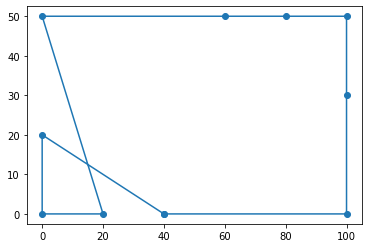


Best solution in population 18
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


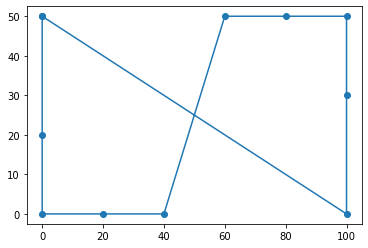


Best solution in population 19
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


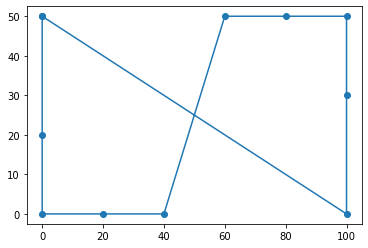


Best solution in population 20
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


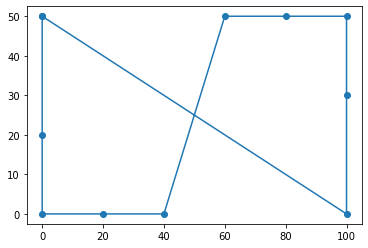


Best solution in population 21
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


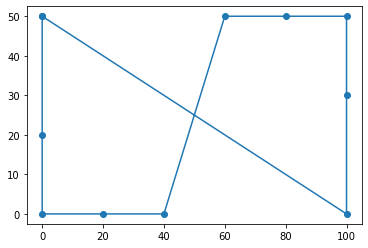


Best solution in population 22
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


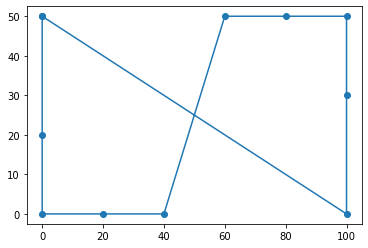


Best solution in population 23
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


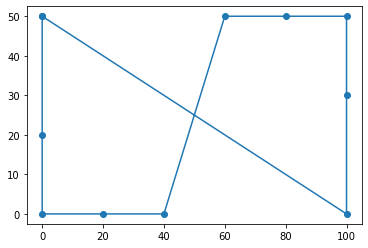


Best solution in population 24
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


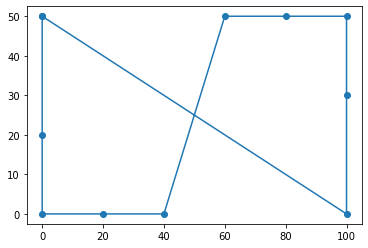


Best solution in population 25
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


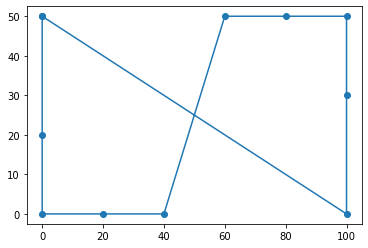


Best solution in population 26
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


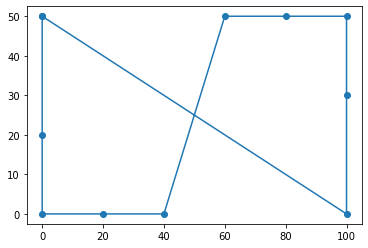


Best solution in population 27
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


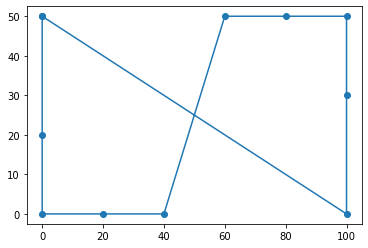


Best solution in population 28
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


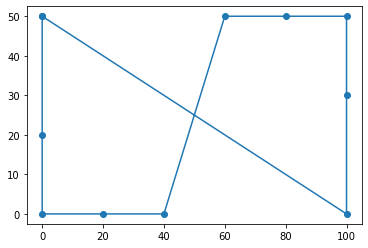


Best solution in population 29
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


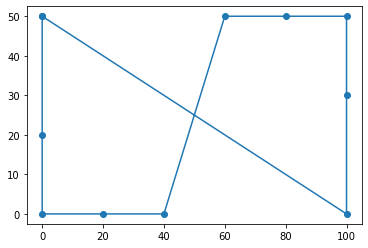


Best solution in population 30
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


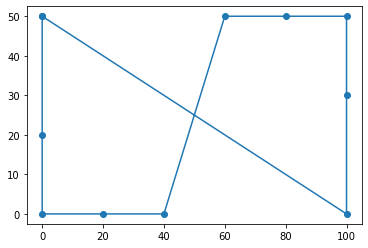


Best solution in population 31
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


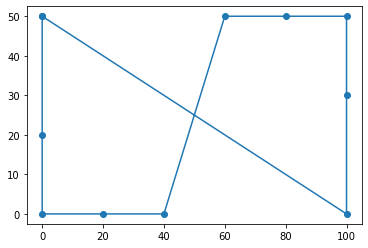


Best solution in population 32
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


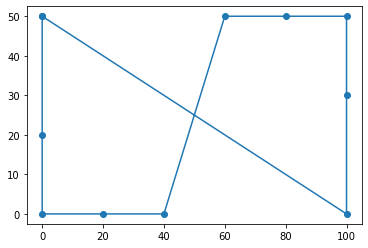


Best solution in population 33
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


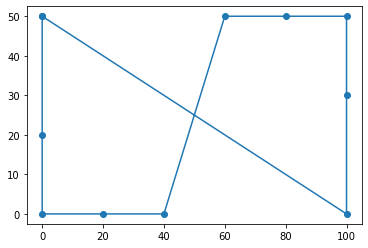


Best solution in population 34
   0  1  2  3  4  5  6  7  8  9  fitness
0  8  9  0  1  2  7  6  5  4  3      344


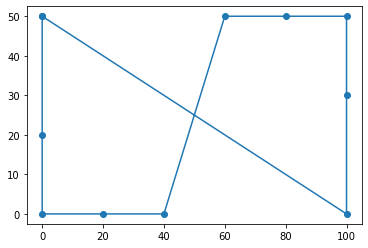


Best solution in population 35
   0  1  2  3  4  5  6  7  8  9  fitness
0  6  5  4  3  2  1  9  0  8  7      328


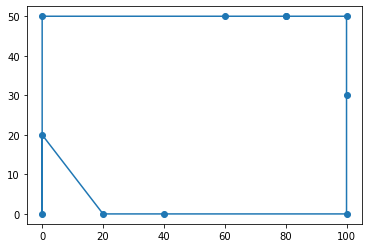


Best solution in population 36
   0  1  2  3  4  5  6  7  8  9  fitness
0  6  5  4  3  2  1  9  0  8  7      328


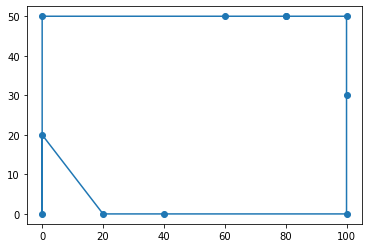


Best solution in population 37
   0  1  2  3  4  5  6  7  8  9  fitness
0  6  5  4  3  2  1  9  0  8  7      328


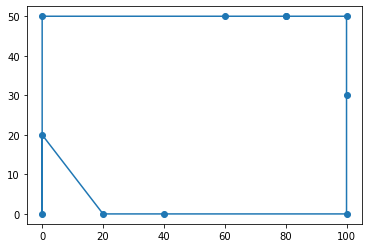


Best solution in population 38
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


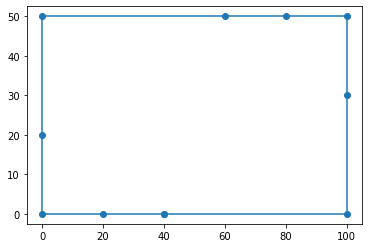


Best solution in population 39
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


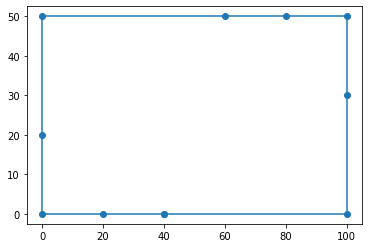


Best solution in population 40
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


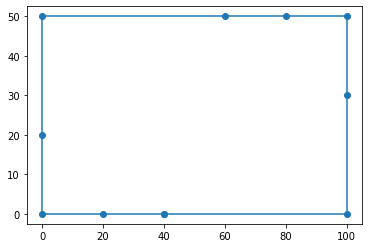


Best solution in population 41
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


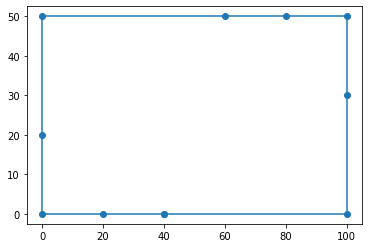


Best solution in population 42
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


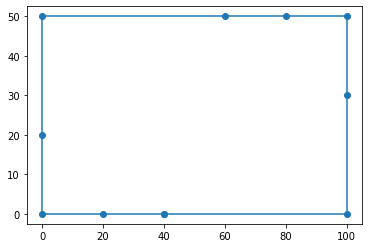


Best solution in population 43
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


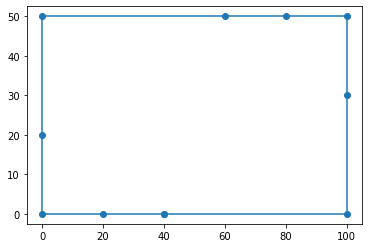


Best solution in population 44
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


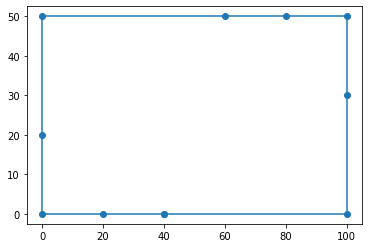


Best solution in population 45
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


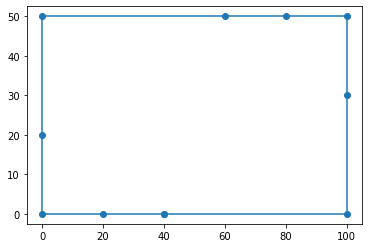


Best solution in population 46
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


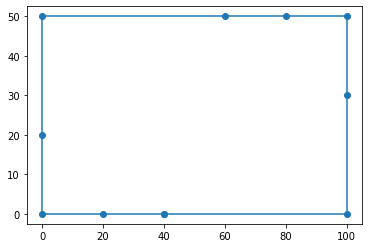


Best solution in population 47
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


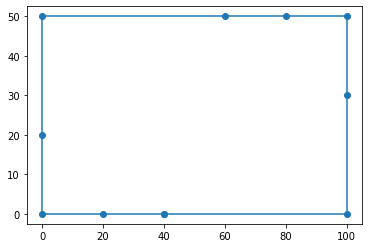


Best solution in population 48
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


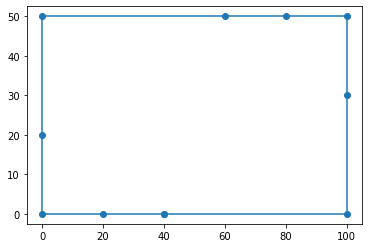


Best solution in population 49
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


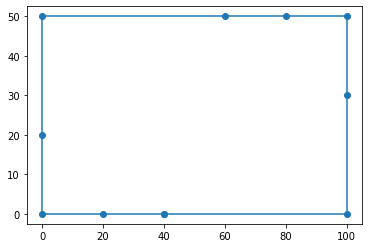


Best solution in population 50
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


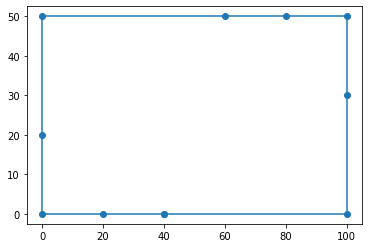


Best solution in population 51
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


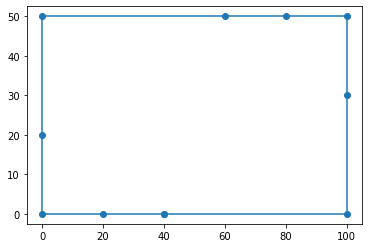


Best solution in population 52
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


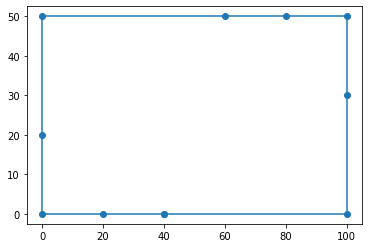


Best solution in population 53
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


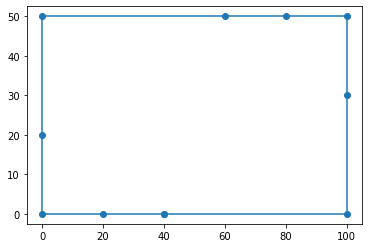


Best solution in population 54
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


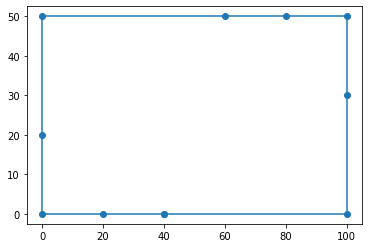


Best solution in population 55
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


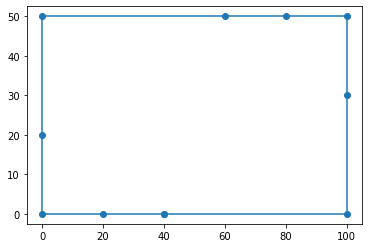


Best solution in population 56
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


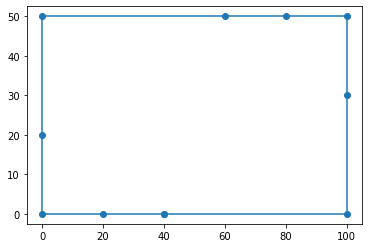


Best solution in population 57
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


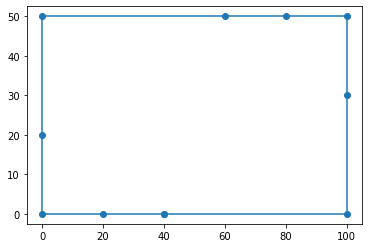


Best solution in population 58
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


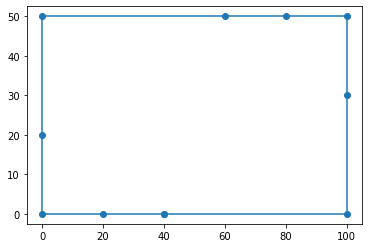


Best solution in population 59
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


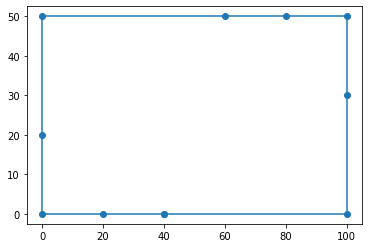


Best solution in population 60
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


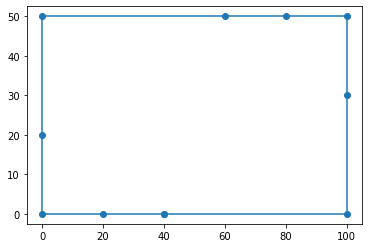


Best solution in population 61
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


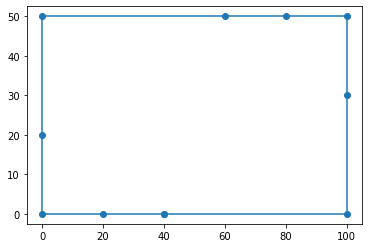


Best solution in population 62
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


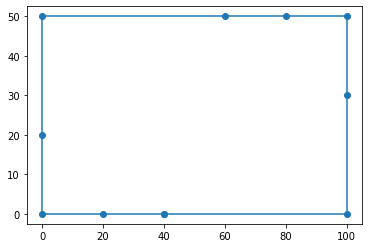


Best solution in population 63
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


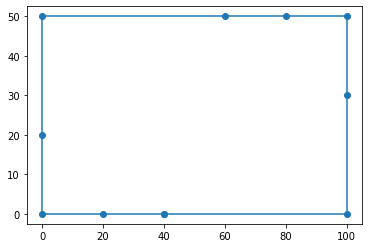


Best solution in population 64
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


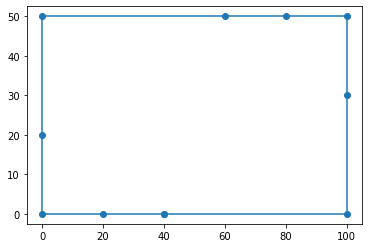


Best solution in population 65
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


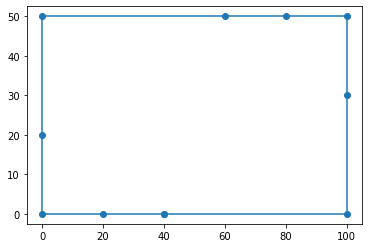


Best solution in population 66
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


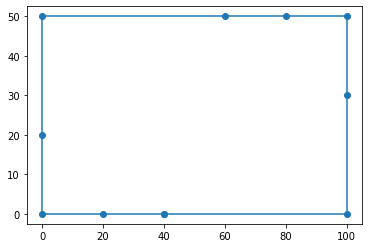


Best solution in population 67
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


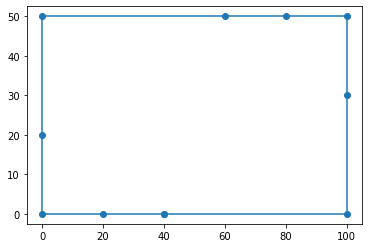


Best solution in population 68
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


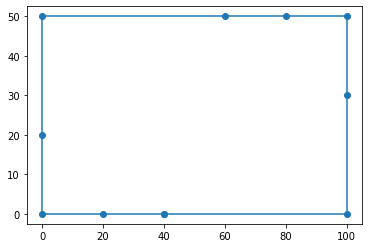


Best solution in population 69
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


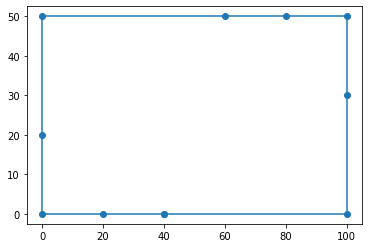


Best solution in population 70
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


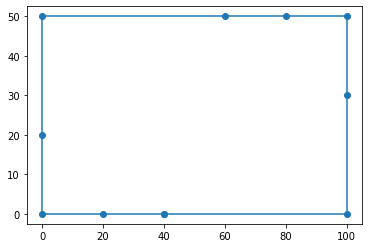


Best solution in population 71
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


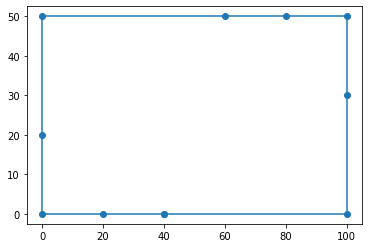


Best solution in population 72
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


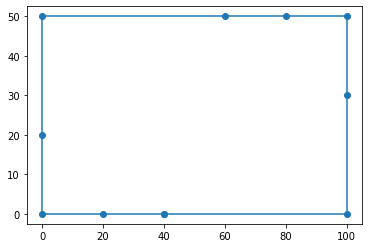


Best solution in population 73
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


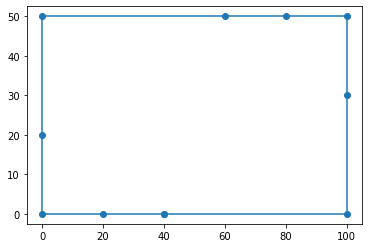


Best solution in population 74
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


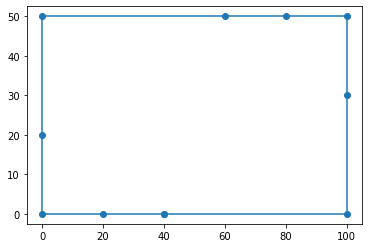


Best solution in population 75
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


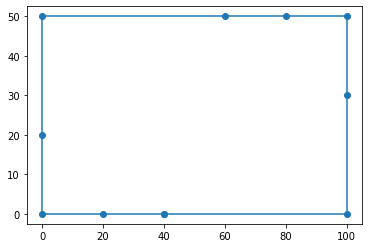


Best solution in population 76
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


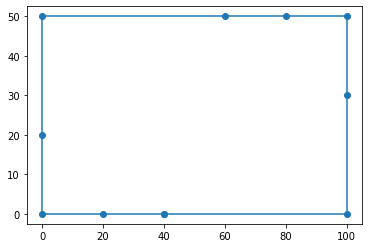


Best solution in population 77
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


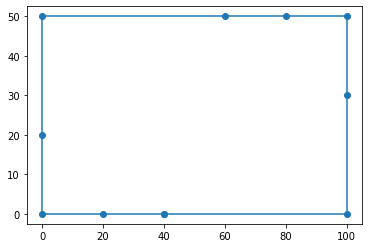


Best solution in population 78
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


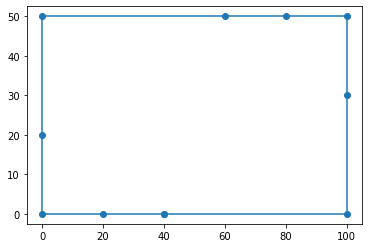


Best solution in population 79
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


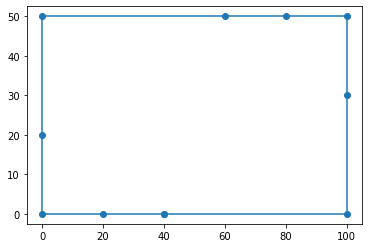


Best solution in population 80
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


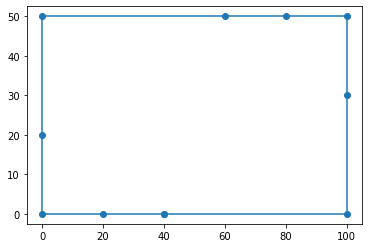


Best solution in population 81
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


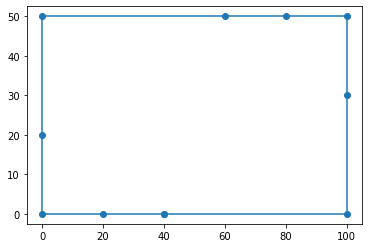


Best solution in population 82
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


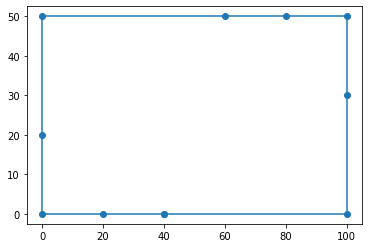


Best solution in population 83
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


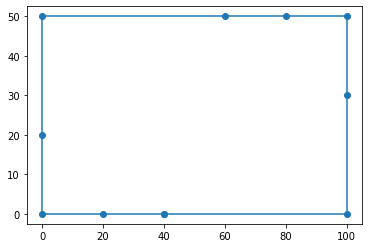


Best solution in population 84
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


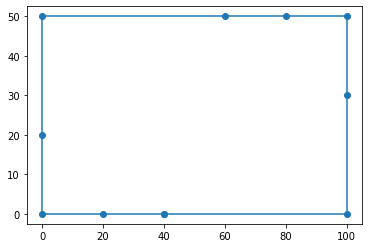


Best solution in population 85
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


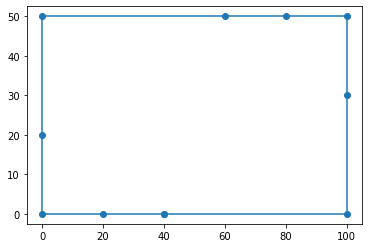


Best solution in population 86
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


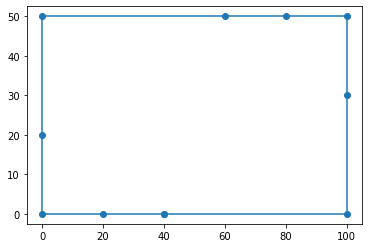


Best solution in population 87
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


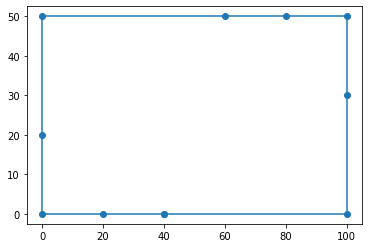


Best solution in population 88
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


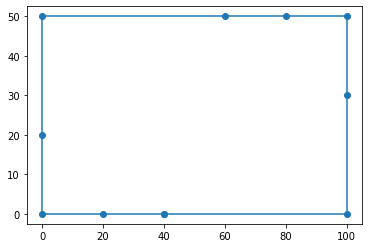


Best solution in population 89
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


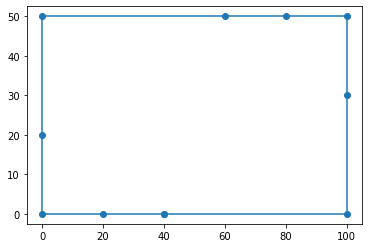


Best solution in population 90
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


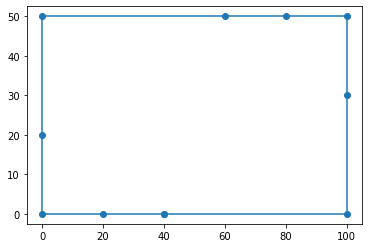


Best solution in population 91
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


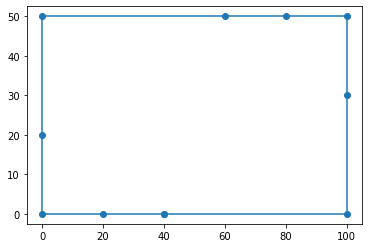


Best solution in population 92
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


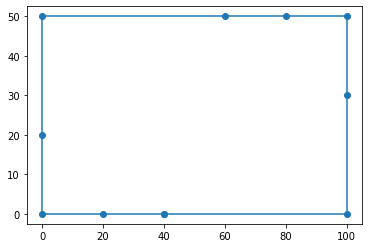


Best solution in population 93
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


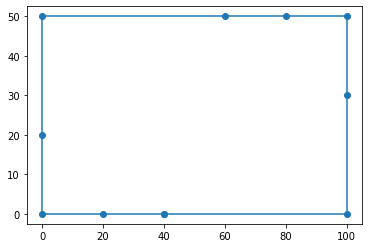


Best solution in population 94
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


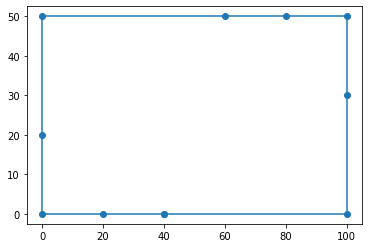


Best solution in population 95
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


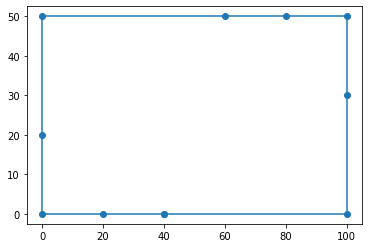


Best solution in population 96
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


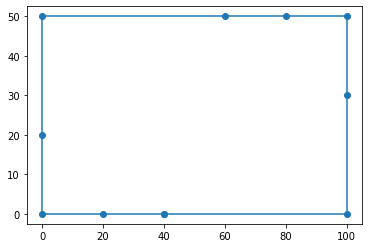


Best solution in population 97
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


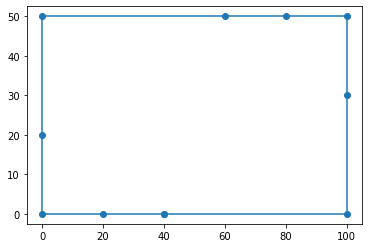


Best solution in population 98
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


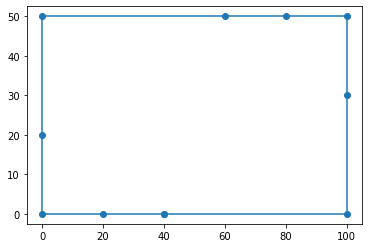


Best solution in population 99
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


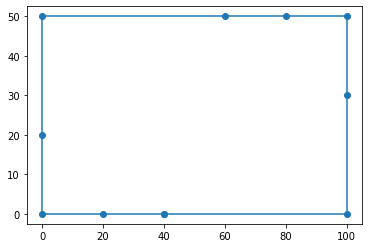


Best solution in population 100
   0  1  2  3  4  5  6  7  8  9  fitness
0  2  1  0  9  8  7  6  5  4  3      300


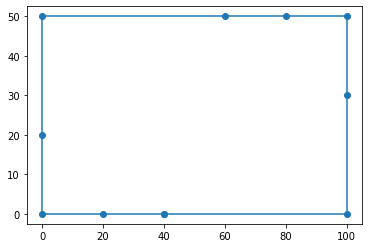

In [15]:
pop = createPopulation()
pop = fitness(pop)
print('Solution in population 0')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    #popc = crossover(pop)
    #popc = fitness(popc)

    popm = mutation(pop)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)

    print()
    print('Best solution in population '+ str(i))
    print(pop.head(1))
    plotSolution(pop)